In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(("C:/Users/AYOMIDE/Documents/AYOMIDE's  BOOKS/DATA/titanic.csv"))

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#data.columns = [columns.replace('', '_') for columns in data.columns]

# DATA CLEANING

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Sex'] = pd.Categorical(data['Sex'])
data['Cabin'] = pd.Categorical(data['Cabin'])
data['Embarked'] = pd.Categorical(data['Embarked'])
data['Survived'] = pd.Categorical(data['Survived'])
data.columns = list(data.columns)
def change_Case(data):
    data['Sex'] = data['Sex'].replace({'male': 'Male', 'female': 'Female'})
    return data
data = change_Case(data)

In [7]:
data = data.fillna(method = 'ffill')
data = data.fillna('C85')

In [8]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# ANALYSIS

In [10]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S


In [11]:
survived = data[data['Survived'] == 1]
survivor = survived['Survived'].size
victim = data[data['Survived'] == 0]
dead = victim['Survived'].size
print(f'The numbers of passengers that survived and died are {survivor} and {dead}, respectively.')


The numbers of passengers that survived and died are 342 and 549, respectively.


In [12]:
men_that_survived = data[(data.Sex == 'Male') & (data.Survived == 1)]
male_survivor = men_that_survived['Survived'].size
men_that_died = data[(data.Sex == 'Male') & (data.Survived == 0)]
victimized_men = men_that_died['Survived'].size
print(f'The numbers of men that survived, and the men that died are {male_survivor} and {victimized_men}, respectively.')


women_that_survived = data[(data.Sex == 'Female' ) & (data.Survived ==1)]
women_survivor = women_that_survived['Sex'].size
women_that_died = data[(data.Sex == 'Female') & (data.Survived == 0)]
victimized_women = women_that_died['Survived'].size
print(f'The numbers of women that survived, and the women died are {women_survivor} and {victimized_women}, respectively.')

male = data[data['Sex'] == 'Male']
male = male['Sex']
male = male.size

female = data[data['Sex'] == 'Female']
female = female['Sex']
female = female.size
print(f'The number of male and female passengers are {male} and {female}, respectively')

The numbers of men that survived, and the men that died are 109 and 468, respectively.
The numbers of women that survived, and the women died are 233 and 81, respectively.
The number of male and female passengers are 577 and 314, respectively


# DATA VISUALIZATION

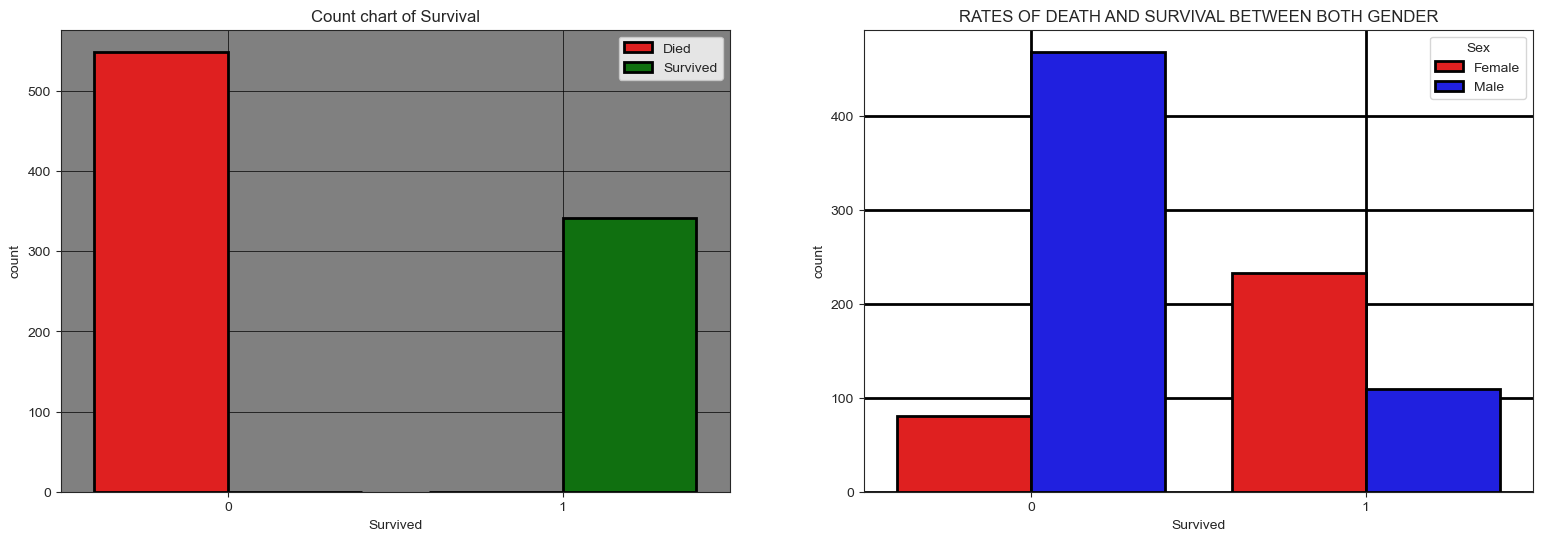

In [13]:
sns.set_style('ticks')
plt.figure(figsize = [19, 6])
plt.subplot(1, 2, 1).set_facecolor('grey')
plt.title('Count chart of Survival')

sns.countplot(x = 'Survived', hue= 'Survived', data = data, palette= [('red'), ('green')],
              edgecolor = 'black', alpha = 1, linewidth = 2)
plt.grid(color = 'black', 
         linewidth = 0.5)
plt.annotate('Survived',xy =([dead,survivor])) #size = 7, xytext = (dead ,survivor))
plt.legend(['Died', 'Survived']);
plt.subplot( 1, 2, 2)
plt.title('RATES OF DEATH AND SURVIVAL BETWEEN BOTH GENDER')
#fig = plt.figure()
sns.countplot(x = ('Survived'), hue = 'Sex', data = data, palette= [('red'), ('blue')],
              edgecolor = 'black', linewidth = 2)
plt.grid(color = 'black', linewidth = 2);

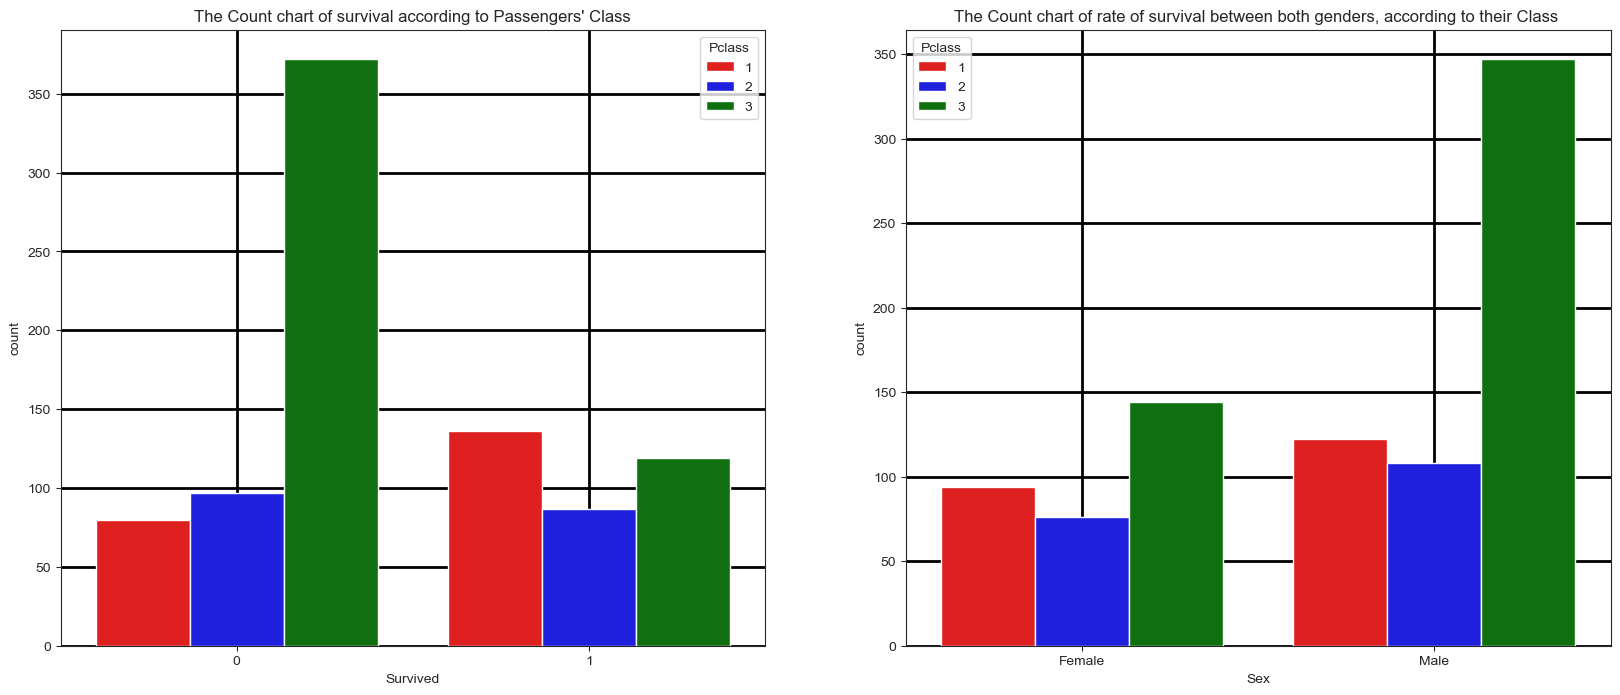

In [14]:
plt.figure(figsize= [20, 8])

plt.subplot(1, 2, 1)
plt.title("The Count chart of survival according to Passengers' Class")
sns.countplot(x = 'Survived', hue = 'Pclass', data = data, palette= (('red'), ('blue'), ('green')))
plt.grid(color = 'black', linewidth= 2);
plt.subplot(1, 2, 2)
plt.title("The Count chart of rate of survival between both genders, according to their Class ")
sns.countplot(x = 'Sex', hue = 'Pclass', data = data, palette= (('red'), ('blue'), ('green')))
plt.grid(color = 'black', linewidth= 2);


,Age,Fare,PassengerId,Pclass
Age,1.000000,0.083417,0.026653,-0.291157
Fare,0.083417,1.000000,0.012658,-0.549500
PassengerId,0.026653,0.012658,1.000000,-0.035144
Pclass,-0.291157,-0.549500,-0.035144,1.000000


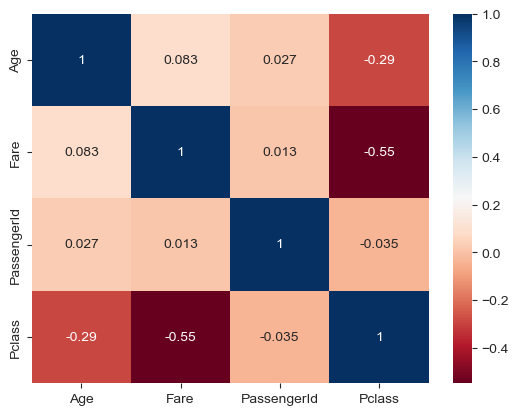

In [15]:
correlation = data[['Survived', 'Age', 'Fare', 'PassengerId', 'Pclass']].corr(numeric_only = True)
sns.heatmap(correlation, cmap = 'RdBu', annot = True, );
correlation

# BUIDLING PREDICTION MODEL

In [16]:
data = data.drop(columns = ['Name', 'Ticket', 'Embarked', 'Cabin', 'SibSp', 'PassengerId', 'Parch', 'Fare'])

In [17]:

x= data.drop(columns = ['Sex'])

y= data['Sex']
model = RandomForestClassifier()
model.fit(x.values, y)


RandomForestClassifier()

In [18]:
data.head(2)

,Survived,Pclass,Sex,Age
0,0,3,Male,22.0
1,1,1,Female,38.0


In [19]:
survival = int(input('Did the passenger survive of not?(0 for died, 1 for survived): '))
pclass = int(input('Enter the Pclass of the passenger(between 1 and 3): '))
age = int(input('Enter the age of the passenger: '))

Did the passenger survive of not?(0 for died, 1 for survived): 1
Enter the Pclass of the passenger(between 1 and 3): 3
Enter the age of the passenger: 45


In [20]:
prediction =(model.predict([[survival, pclass, age]]))
print(prediction)


['Male']


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, test_size= 0.2 )


In [24]:
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = accuracy_score((y_test), (predict))
print(f' The accuracy of the prediction is {round(score*100)}%.')

 The accuracy of the prediction is 75%.
